In [207]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [38]:
import json
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
with open('v2_OpenEnded_mscoco_val2014_questions.json') as f:
  val_questions = json.load(f)['questions']
with open('v2_mscoco_val2014_annotations.json') as f:
  val_annotations = json.load(f)['annotations']

In [ ]:
with open('data/top_answers.pickle', 'rb') as handle:
  top_answers = pickle.load(handle)

In [204]:
predict = np.loadtxt('predictions/predict_d.dat')
print(predict)

[0. 0. 0. ... 0. 1. 2.]


In [205]:
predictions = []
for i,query in enumerate(val_annotations):
  prediction = {}
  prediction['answer'] = list(top_answers)[int(predict[i])]
  prediction['question_id'] = query['question_id']
  predictions.append(prediction)

In [102]:
with open('predictions/predict_a.json', 'w') as outfile:
    json.dump(predictions, outfile)

In [192]:
queries = [int(100 + np.random.rand() * 5000) for i in range(25)]

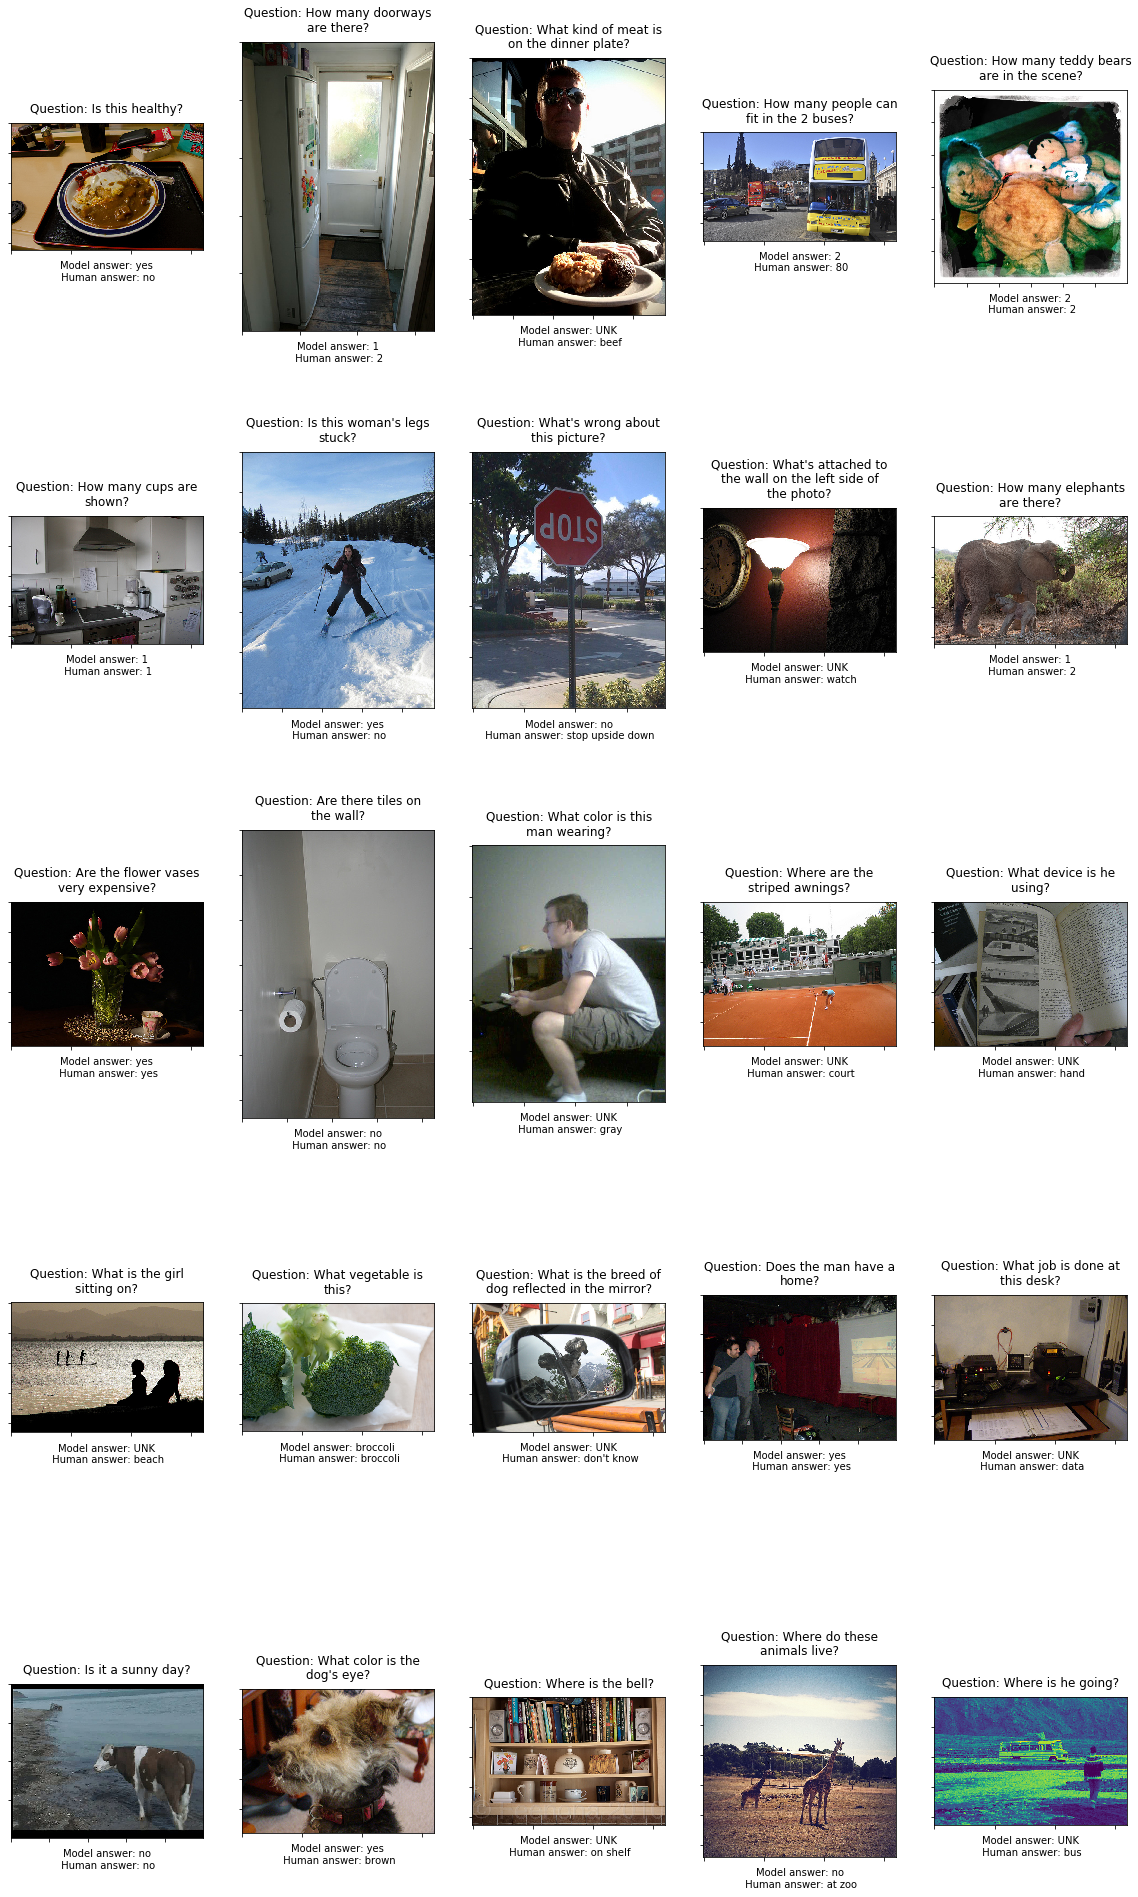

In [206]:
from textwrap import wrap

fig = plt.figure(figsize=(20, 35))
for i,q in enumerate(queries):
  ax = fig.add_subplot(5, 5, i+1)
  question = val_questions[q]['question']
  annotation = val_annotations[q]
  image_id = annotation['image_id']
  answer = predictions[q]['answer']
  img_path = 'val2014/COCO_val2014_' + str(image_id).zfill(12) + '.jpg'
  img = plt.imread(img_path)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.imshow(img)
  plt.title('\n'.join(wrap('Question: {}'.format(question), 30)), pad=10)
  plt.xlabel('Model answer: {}\n Human answer: {}'.format(answer, annotation['answers'][0]['answer']))

In [166]:
plt.savefig('results/modelD.png')

<Figure size 432x288 with 0 Axes>

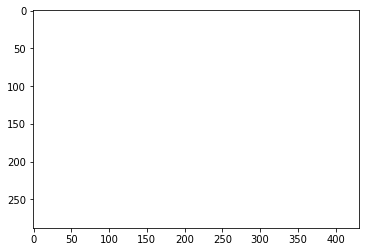